### Plotting ERPs

For this homework my Mac computer with an intel chip is a little overloaded, and I also think my laptop is running out of storage and not able to download all the files. I did this plotting on SS01 (as of Tuesday).

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import mne
import pandas
import os

### Note

matplotlib: for plotting graphs and ERPs.

numpy: for numerical operations on arrays.

scipy: for signal processing tasks.

mne: specifically designed for neurophysiological data analysis (like ERP data).

pandas: for data manipulation and analysis.

In [2]:
# Specify the directory 
directory_path = '/Users/ariel/Desktop/Spring24/525/ERPlab/SS01'

files_in_directory = os.listdir(directory_path)
print(files_in_directory)

['SS01-SR-02082016.ceo', 'SS01-SR-02082016.dat', 'SS01-SR-02082016-cnt.cnt', 'SS01-SR-02082016-cnt.rs3', 'SS01-SR-02082016.dap', 'SS01-SR-02082016.rs3', 'SS01-SR-02082016-cnt.dap']


### Notes for asking ChatGPT about the file types and what they do

.cnt: This is likely a continuous data file from an EEG system.

.dap: This could be an associated data file that contains settings or parameters for the EEG data acquisition.

.rs3: These are likely resource files associated with the .cnt file, possibly containing additional settings or channel information.

.ceo: This might be a custom event or electrode overlay file.


In [7]:
rs3_file_path = '/Users/ariel/Desktop/Spring24/525/ERPlab/SS01/SS01-SR-02082016-cnt.rs3'

# Attempt to open the .rs3 file and read its content as text
try:
    with open(rs3_file_path, 'r') as file:
        rs3_content = file.read()
        print(rs3_content)
except Exception as e:
    print(f"An error occurred while reading .rs3 file: {e}")

﻿NUMBERS START
   ListDescription      = SensorNumbers
   ListUnits            = 
   ListNrColumns        =  1
   ListNrRows           =  66
   ListNrTimepts        =  1
   ListNrBlocks         =  1
   ListBinary           =  0
   ListType             =  0
   ListTrafoType        =  0
   ListGridType         =  2
   ListFirstColumn      =  1
   ListIndexMin         = -1
   ListIndexMax         = -1
   ListIndexAbsMax      = -1
NUMBERS END

NUMBERS START_LIST	# Do not edit!
  1
  2
  3
  4
  5
  6
  7
  8
  9
  10
  11
  12
  13
  14
  15
  16
  17
  18
  19
  20
  21
  22
  23
  24
  25
  26
  27
  28
  29
  30
  31
  32
  33
  34
  35
  36
  37
  38
  39
  40
  41
  42
  43
  44
  45
  46
  47
  48
  49
  50
  51
  52
  53
  54
  55
  56
  57
  58
  59
  60
  61
  62
  63
  64
  65
  66
NUMBERS END_LIST

LABELS START
   ListDescription      = SensorLabels
   ListUnits            = 
   ListNrColumns        =  40
   ListNrRows           =  66
   ListNrTimepts        =  1
   ListNrBlocks

In [8]:
rs3_second_file_path = '/Users/ariel/Desktop/Spring24/525/ERPlab/SS01/SS01-SR-02082016.rs3'

# Attempt to open the second .rs3 file and read its content as text
try:
    with open(rs3_second_file_path, 'r') as file:
        rs3_second_content = file.read()
        print(rs3_second_content)
except Exception as e:
    print(f"An error occurred while reading second .rs3 file: {e}")

﻿NUMBERS START
   ListDescription      = SensorNumbers
   ListUnits            = 
   ListNrColumns        =  1
   ListNrRows           =  66
   ListNrTimepts        =  1
   ListNrBlocks         =  1
   ListBinary           =  0
   ListType             =  0
   ListTrafoType        =  0
   ListGridType         =  2
   ListFirstColumn      =  1
   ListIndexMin         = -1
   ListIndexMax         = -1
   ListIndexAbsMax      = -1
NUMBERS END

NUMBERS START_LIST	# Do not edit!
  1
  2
  3
  4
  5
  6
  7
  8
  9
  10
  11
  12
  13
  14
  15
  16
  17
  18
  19
  20
  21
  22
  23
  24
  25
  26
  27
  28
  29
  30
  31
  32
  33
  34
  35
  36
  37
  38
  39
  40
  41
  42
  43
  44
  45
  46
  47
  48
  49
  50
  51
  52
  53
  54
  55
  56
  57
  58
  59
  60
  61
  62
  63
  64
  65
  66
NUMBERS END_LIST

LABELS START
   ListDescription      = SensorLabels
   ListUnits            = 
   ListNrColumns        =  40
   ListNrRows           =  66
   ListNrTimepts        =  1
   ListNrBlocks

Above was when I was trying to figure out what each file even does. I eventually figured out that the .cnt file is the one that contains raw data that is annotated with event ID numbers.

In [3]:
# Loading in the EEG data

# Assuming 'SS01-SR-02082016.cnt' is your raw EEG file.
file_path = '/Users/ariel/Desktop/Spring24/525/ERPlab/SS01/SS01-SR-02082016-cnt.cnt'

raw = mne.io.read_raw_cnt(file_path, preload=True)
print(raw.info)  # To see information about the recording and available channels

Reading 0 ... 5089799  =      0.000 ...  5089.799 secs...
<Info | 10 non-empty values
 bads: 1 items (Trigger)
 ch_names: FP1, FPz, FP2, AF7, AF3, AF1, AF2, AF4, AF8, F7, F5, F3, F1, Fz, ...
 chs: 69 EEG
 custom_ref_applied: False
 dig: 72 items (3 Cardinal, 69 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2016-02-08 19:10:33 UTC
 nchan: 69
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>


In [4]:
raw = mne.io.read_raw_cnt(file_path, eog='auto', preload=True, verbose=None)

# To access the data for the Cz electrode
cz_data = raw.pick_channels(['Cz'])

print(cz_data)

Reading 0 ... 5089799  =      0.000 ...  5089.799 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<RawCNT | SS01-SR-02082016-cnt.cnt, 1 x 5089800 (5089.8 s), ~38.9 MB, data loaded>


Reading 0 ... 5089799  =      0.000 ...  5089.799 secs...
Using matplotlib as 2D backend.


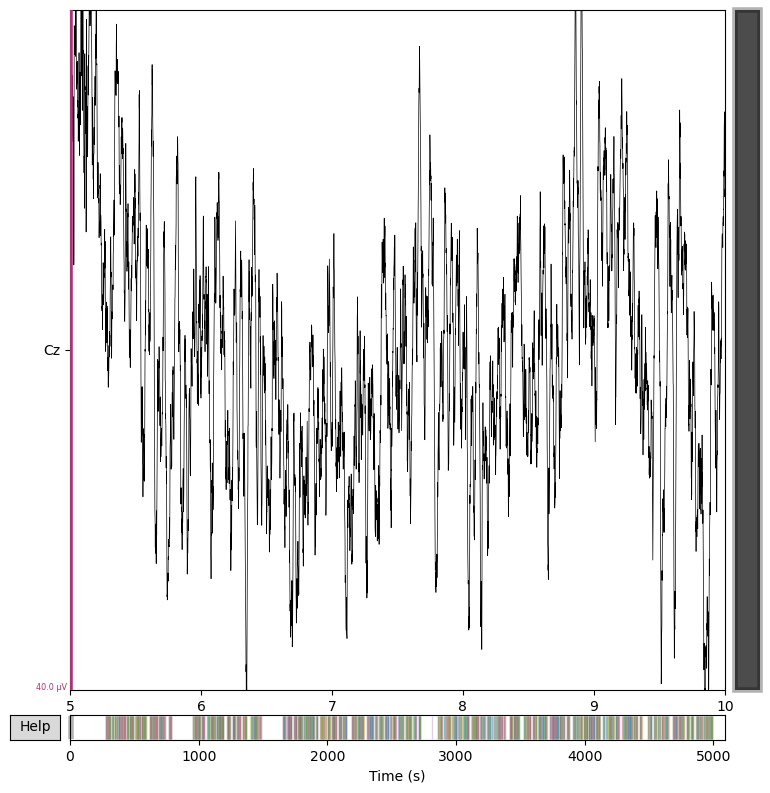

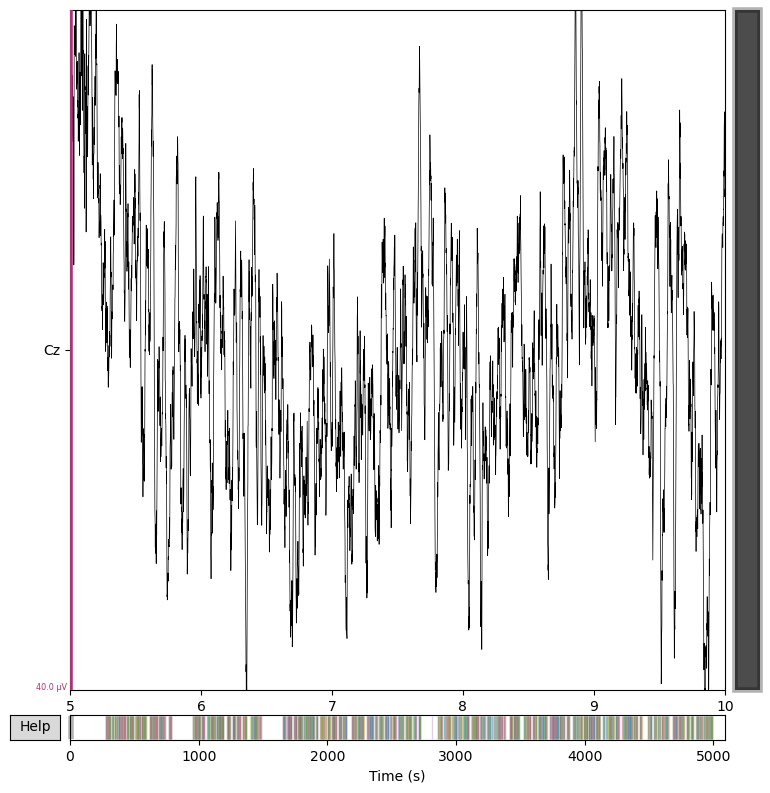

In [5]:
# Plotting the whole EEG for Cz electrode.
# Load the raw data
raw = mne.io.read_raw_cnt(file_path, preload=True)

# Pick the Cz channel by name
picks = mne.pick_channels(raw.info['ch_names'], include=['Cz'])

# Plot the continuous data for the Cz electrode
raw.plot(picks=picks, duration=5, start=5)  # Plots 5 seconds of data starting at 5 seconds

Got a message that said "no stim channels found, but the raw object has annotations. Consider using mne.events_from_annotations to convert these to events."

In [6]:
# Convert annotations to events
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['11', '111', '112', '113', '114', '115', '12', '121', '122', '123', '124', '125', '13', '131', '132', '133', '134', '135', '14', '141', '142', '143', '144', '145', '15', '201', '202', '203', '204', '205', '206', '207', '208', '21', '211', '212', '213', '214', '215', '216', '217', '218', '22', '224', '23', '239', '24', '25', '255', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55', '56']


These are events annotated by number. 

If indeed (credits to Dragos for finding this) 203 and 207 might be the ones we want, then we attempt to find this in the data.

In [9]:
# Double check if the event IDs 203 and 207 are present in the event_id dictionary
if '203' in event_id and '207' in event_id:
    # Create epochs around these specific events
    epochs = mne.Epochs(raw, events, event_id={'congruent': event_id['203'], 'incongruent': event_id['207']},
                        tmin=-0.2, tmax=0.8, preload=True, baseline=(None, 0), picks='Cz')
else:
    print("The event IDs 203 and 207 are not found in the annotations.")

Not setting metadata
50 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 50 events and 1001 original time points ...
0 bad epochs dropped


It looks like the epochs were successfully created around the events with annotations 203 and 207, which correspond to the congruent and incongruent conditions, respectively. This step was crucial for segmenting the EEG data relative to these specific events. The next step is to average the epochs to get the ERPs for each condition and then plot these averages. 

In [11]:
# Average the epochs to get ERPs
evoked_congruent = epochs['congruent'].average()
evoked_incongruent = epochs['incongruent'].average()

In [13]:
print(evoked_congruent)
print(evoked_incongruent)

<Evoked | 'congruent' (average, N=25), -0.2 – 0.8 s, baseline -0.2 – 0 s, 1 ch, ~41 kB>
<Evoked | 'incongruent' (average, N=25), -0.2 – 0.8 s, baseline -0.2 – 0 s, 1 ch, ~41 kB>


Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


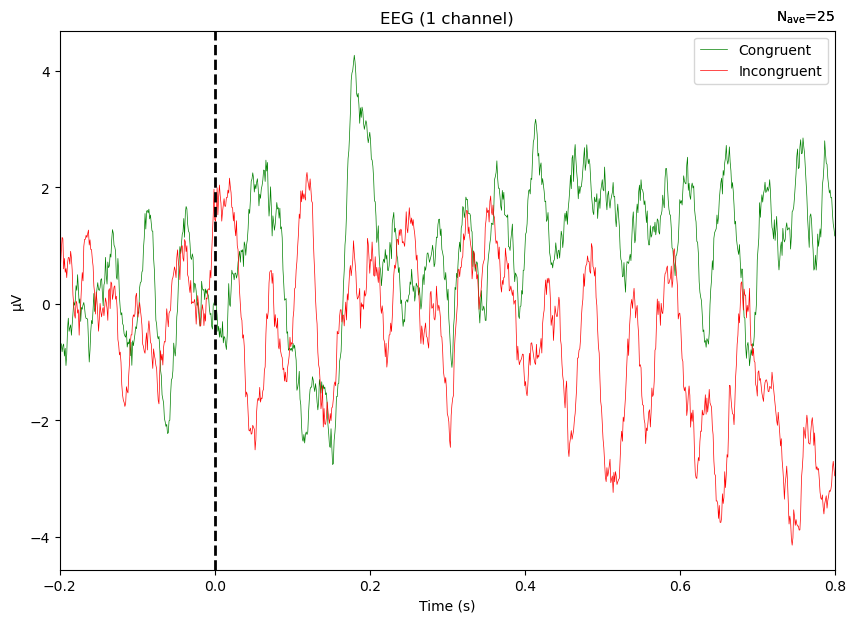

In [32]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the ERPs without specifying color
evoked_congruent.plot(axes=ax, time_unit='s', show=False, spatial_colors=True)
evoked_incongruent.plot(axes=ax, time_unit='s', show=False, spatial_colors=True)

# Get lines from the axes and adjust their properties
lines = ax.lines
lines[0].set_color('green')  # Assuming the first line is congruent
lines[1].set_color('red')    # Assuming the second line is incongruent
lines[0].set_label('Congruent')
lines[1].set_label('Incongruent')

# Add a vertical line at time zero to mark the event onset
ax.axvline(0, linestyle='--', color='black', linewidth=2)

# Add legend
ax.legend()

# Display the plot
plt.show()

Success???